In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

import plotly.express as px

<IPython.core.display.Javascript object>

In [3]:
environ = pd.read_csv("data/World_countries_env_vars.csv")

<IPython.core.display.Javascript object>

In [4]:
environ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  243 non-null    object 
 1   accessibility_to_cities  238 non-null    float64
 2   elevation                237 non-null    float64
 3   aspect                   237 non-null    float64
 4   slope                    237 non-null    float64
 5   cropland_cover           243 non-null    float64
 6   tree_canopy_cover        232 non-null    float64
 7   isothermality            237 non-null    float64
 8   rain_coldestQuart        237 non-null    float64
 9   rain_driestMonth         238 non-null    float64
 10  rain_driestQuart         238 non-null    float64
 11  rain_mean_annual         238 non-null    float64
 12  rain_seasonailty         238 non-null    float64
 13  rain_warmestQuart        237 non-null    float64
 14  rain_wettestMonth        2

<IPython.core.display.Javascript object>

In [5]:
drop_cols = ["aspect", "slope", "wind"]

<IPython.core.display.Javascript object>

In [6]:
environ[environ["elevation"].isna()]

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,...,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
3,Antarctica,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.807829
39,Greenland,11245.804950,NaN,NaN,NaN,0.000000,0.297000,15.401358,158.538520,42.211411,...,5.222259,-18.875726,0.914455,-17.213942,-32.557318,99.924576,-3.306808,-12.287875,NaN,NaN
128,Iceland,366.518576,NaN,NaN,NaN,1.698976,6.748369,32.434139,329.250526,70.204031,...,5.432530,4.627690,10.383742,1.140138,-6.101536,40.420986,6.736054,-1.126204,NaN,NaN
190,Faroe Islands,1444.616397,NaN,NaN,NaN,1.990950,10.894526,35.392672,418.927615,70.352229,...,4.257533,8.190782,12.334336,5.789643,0.472890,27.885687,9.491812,4.523676,NaN,NaN
201,Aland,235.068864,NaN,NaN,NaN,21.021611,40.908569,24.188948,114.723856,26.964629,...,6.882545,-1.280922,19.595752,4.515330,-8.102941,72.670694,14.357984,9.901886,NaN,NaN
242,Vatican,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
missingy_cols = environ[environ.isna().mean(axis=1) > 0.2].index
environ = environ.drop(labels=missingy_cols)

<IPython.core.display.Javascript object>

In [8]:
environ[environ["tree_canopy_cover"].isna()]
environ["tree_canopy_cover"] = environ["tree_canopy_cover"].replace(np.nan, 0)

<IPython.core.display.Javascript object>

In [9]:
environ[environ["elevation"].isna()]
environ["elevation"] = environ["elevation"].replace(np.nan, 0)

<IPython.core.display.Javascript object>

In [10]:
environ[environ["cloudiness"].isna()]
environ["cloudiness"] = environ["cloudiness"].replace(
    np.nan, environ["cloudiness"].median()
)

<IPython.core.display.Javascript object>

In [11]:
environ = environ.drop(columns=drop_cols)

<IPython.core.display.Javascript object>

In [12]:
environ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  237 non-null    object 
 1   accessibility_to_cities  237 non-null    float64
 2   elevation                237 non-null    float64
 3   cropland_cover           237 non-null    float64
 4   tree_canopy_cover        237 non-null    float64
 5   isothermality            237 non-null    float64
 6   rain_coldestQuart        237 non-null    float64
 7   rain_driestMonth         237 non-null    float64
 8   rain_driestQuart         237 non-null    float64
 9   rain_mean_annual         237 non-null    float64
 10  rain_seasonailty         237 non-null    float64
 11  rain_warmestQuart        237 non-null    float64
 12  rain_wettestMonth        237 non-null    float64
 13  rain_wettestQuart        237 non-null    float64
 14  temp_annual_range        2

<IPython.core.display.Javascript object>

In [17]:
data = environ.drop(columns="Country")

<IPython.core.display.Javascript object>

PCA

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

<IPython.core.display.Javascript object>

In [115]:
pca = PCA(2)
pcs = pca.fit_transform(scaled_data)
environ["pc0"] = pcs[:, 0]
environ["pc1"] = pcs[:, 1]
pca.explained_variance_ratio_  # 1st 2 pc's explain ~

array([0.44225391, 0.24908076])

<IPython.core.display.Javascript object>

In [116]:
environ

,Country,accessibility_to_cities,elevation,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,...,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,cloudiness,labels,pc0,pc1
0,Russia,2143.587912,448.533542,7.381210,20.356473,19.351714,63.279186,15.345187,52.450745,434.729235,...,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,210.990816,2,-6.999397,3.331107
1,United States of America,638.757539,759.251226,19.743870,16.728462,32.952882,141.820680,28.787362,100.500560,671.911733,...,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,180.274639,2,-4.166045,0.986385
2,Canada,3220.715175,508.284763,3.796340,20.587476,19.862863,80.937465,19.612252,66.220983,453.318423,...,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,231.498702,2,-6.757578,4.024034
4,Indonesia,504.884807,342.053688,13.240866,55.478882,84.942402,673.078720,136.174030,449.847542,2728.355157,...,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,293.095107,1,5.213409,2.148295
5,China,466.566902,1788.508668,22.183475,11.579313,30.945546,34.736686,8.319759,30.975238,561.271580,...,25.190887,6.362946,-14.720426,98.902804,18.397897,17.672922,191.244661,2,-4.784542,0.560215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Monaco,3.000000,382.000000,16.666667,31.555556,33.449348,222.061188,24.917252,120.016136,837.198547,...,24.531044,12.453555,2.131087,53.352100,19.455553,9.904590,200.025000,2,-1.805671,1.104930
236,Nauru,4057.750000,1.058824,0.000000,0.000000,87.092227,507.950693,103.969207,334.446050,2059.921556,...,31.255396,27.755396,24.733870,1.466026,27.933870,27.686147,255.277206,1,4.481927,0.443321
237,Cook Islands,4962.736842,51.232558,0.000000,62.000000,56.299699,409.961822,118.403061,406.854352,2306.987036,...,28.749557,23.733192,19.071107,15.087457,25.650042,25.349350,233.982267,1,4.137678,2.311367
238,Saint Barthelemy,645.800000,7.117647,0.000000,13.000000,64.472688,164.512988,46.243420,163.718646,1038.967122,...,31.062595,26.770146,22.143781,11.262728,27.970133,27.481434,186.622794,1,1.975619,-1.051639


<IPython.core.display.Javascript object>

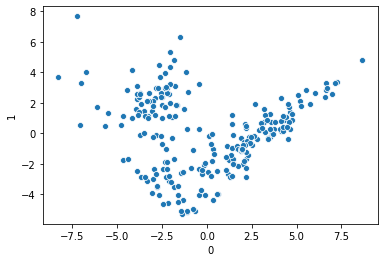

<IPython.core.display.Javascript object>

In [47]:
sns.scatterplot(x=pcs[0], y=pcs[1], data=pcs)
plt.show()

K-Means

In [84]:
k = 4
# 3 or 4 is the best bet

<IPython.core.display.Javascript object>

In [79]:
kmeans = KMeans(k)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

In [80]:
labels = kmeans.labels_
environ_kmeans3 = environ
pcs["labels"] = labels
environ_kmeans3["labels"] = labels
environ_kmeans3["labels"].value_counts()

3    76
1    73
0    51
2    37
Name: labels, dtype: int64

<IPython.core.display.Javascript object>

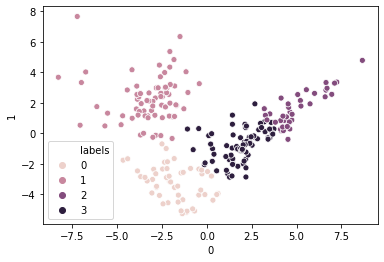

<IPython.core.display.Javascript object>

In [81]:
sns.scatterplot(x=pcs[0], y=pcs[1], data=pcs, hue=pcs["labels"])
plt.show()

In [69]:
environ_kmeans3.groupby("labels").mean().T.style.background_gradient(axis=1)

labels,0,1,2,3
accessibility_to_cities,2283.582085,855.823688,430.789299,425.281291
elevation,200.429083,682.041370,353.910678,549.325360
cropland_cover,2.947670,32.329668,11.562836,15.599266
tree_canopy_cover,40.470466,19.328819,27.600600,3.121380
isothermality,77.542528,31.871154,64.712386,48.664906
rain_coldestQuart,599.893524,183.607818,225.466554,83.396792
rain_driestMonth,114.836735,39.956297,31.219992,2.263292
rain_driestQuart,389.980984,132.956452,117.468877,10.696985
rain_mean_annual,2694.070762,835.744680,1510.962215,381.308932
rain_seasonailty,37.774796,35.081386,61.151504,92.945057


<IPython.core.display.Javascript object>

Gaussin Mixture Model

In [127]:
k = 4

<IPython.core.display.Javascript object>

In [128]:
gmm = GaussianMixture(n_components=k)
gmm.fit(scaled_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<IPython.core.display.Javascript object>

In [129]:
labels = gmm.predict(scaled_data)
environ_gmm = environ
environ_gmm["labels"] = labels
environ_gmm["labels"].value_counts()

2    74
3    73
0    46
1    44
Name: labels, dtype: int64

<IPython.core.display.Javascript object>

In [130]:
# pcs = pcs.rename(columns={0: "0", 1: "1"})
en

NameError: name 'en' is not defined

<IPython.core.display.Javascript object>

In [131]:
px.scatter(data_frame=environ_gmm, x=environ_gmm['pc0'], y=environ_gmm['pc1'], color=environ_gmm["labels"], hover_data=['Country'])


<IPython.core.display.Javascript object>

In [132]:
environ_gmm.groupby("labels").mean().T.style.background_gradient(axis=1)

labels,0,1,2,3
accessibility_to_cities,1930.109897,475.770461,842.577534,401.517560
elevation,214.603340,526.512867,649.509223,432.903324
cropland_cover,3.137229,13.970671,32.441886,13.641855
tree_canopy_cover,42.146811,1.646054,19.082425,22.856578
isothermality,76.270725,46.249037,32.014567,63.494354
rain_coldestQuart,545.174258,79.983259,188.700504,191.791777
rain_driestMonth,102.263229,1.783398,40.517802,24.467817
rain_driestQuart,350.928644,8.324705,134.782673,93.220003
rain_mean_annual,2577.101615,283.419190,834.098266,1353.979637
rain_seasonailty,40.772699,90.887374,34.198058,68.992557


<IPython.core.display.Javascript object>

DBSCAN